# Descriptive Analytics



You know the drill by now - never reinvent the wheel!

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Part 1: Descriptive statistics

If using Google Colab, we need to upload our data (chimera_data.csv) to make it useable. Luckily, we can simply create a "choose file" button and then select and upload our file.
```
import os.path
from google.colab import files
if not os.path.exists("chimera_data.csv"):
    uploaded = files.upload()
```

Once we have uploaded our file, we need to set a path to it and acces it with `pandas`:

In [3]:
path = "chimera_data.csv"
df = pd.read_csv(path, sep = ",") # create a pandas data frame to store data, set the type of separator used in your CSV file

Let's take a sneak peak at what we imported:

In [4]:
df.head()

,admin_support,age,boss_survey,boss_tenure,city_size,clock_in,core,education,gender,half_day_leaves,...,remote,salary,subordinates,team_size,tenure,tenure_unit,training,variable_pay,years_since_promotion,exit
0,2,35,0.655444,3,6.1,1,1,2,1,4,...,0,53.894035,0,9,3,3,3,11,3,0
1,0,33,0.533455,4,9.4,0,1,2,0,5,...,0,35.606964,0,6,1,1,3,1,3,0
2,0,32,0.486568,5,2.2,0,1,1,0,4,...,0,27.400360,0,10,2,2,3,1,4,0
3,0,40,0.477364,4,4.3,0,1,3,0,4,...,0,36.138199,0,8,1,1,3,0,4,0
4,2,47,0.603230,4,2.2,0,1,1,1,5,...,0,42.778580,1,9,1,1,2,11,4,1


We can also get a summary of each column:

In [5]:
summary_stats = df.describe()
print(summary_stats)

       admin_support           age   boss_survey   boss_tenure     city_size  \
count   18132.000000  18132.000000  18132.000000  18132.000000  18132.000000   
mean        0.600044     37.890304      0.500000      3.622711      5.423323   
std         0.732621      4.747666      0.200000      1.058489      2.803621   
min         0.000000     19.000000     -0.379568      3.000000      0.900000   
25%         0.000000     35.000000      0.364875      3.000000      2.200000   
50%         0.000000     38.000000      0.500567      3.000000      6.100000   
75%         1.000000     41.000000      0.634155      4.000000      9.400000   
max         2.000000     56.000000      1.388878     32.000000      9.400000   

           clock_in          core     education        gender  \
count  18132.000000  18132.000000  18132.000000  18132.000000   
mean       0.349162      0.802669      1.380157      0.628723   
std        0.476718      0.397995      0.660531      0.483160   
min        0.000000

As you already know, visualization is an extremely powerful tool within the descriptive analytics arsenal. Usually, you want to check the histograms of some of the key variables to get a feel for the data and to discover any issues (more on this part in class).

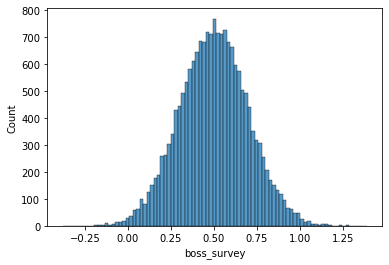

In [6]:
sns.histplot(data=df, x="boss_survey")
plt.show()

We can also count the number of empty values per column (note that there is none here - the dataset is already cleaned):

In [7]:
df.isnull().sum()

admin_support            0
age                      0
boss_survey              0
boss_tenure              0
city_size                0
clock_in                 0
core                     0
education                0
gender                   0
half_day_leaves          0
high_potential           0
job_satisfaction         0
kpi_performance          0
local                    0
part_time                0
rank                     0
remote                   0
salary                   0
subordinates             0
team_size                0
tenure                   0
tenure_unit              0
training                 0
variable_pay             0
years_since_promotion    0
exit                     0
dtype: int64

# Part 2: Bivariate tests

## 2.1 t-tests

Let's see whether we can find any initial trends in the data. For example, are women more likely to exit the firm? We will use [t-tests](https://towardsdatascience.com/the-statistical-analysis-t-test-explained-for-beginners-and-experts-fd0e358bbb62) to analyze the difference in means:

In [8]:
ttest = sm.stats.ttest_ind(df[df.gender==0].exit,df[df.gender==1].exit)

tstat = ttest[0]
pvalue = ttest[1]

print('the tstat for gender differences in exit is =', tstat)
print('the pvalue is =', pvalue)

the tstat for gender differences in exit is = 1.4717646026099311
the pvalue is = 0.14110181255942417


The data indicates that women are, on average, more likely to quit. However, the finding is not very [significant from a statistical perspective](https://hbr.org/2016/02/a-refresher-on-statistical-significance). Also, don't forget that we are just taking a look at two variables, ignoring a lot of other information!

Maybe exiters are paid less?

In [9]:
ttest = sm.stats.ttest_ind(df[df.exit==1].salary,df[df.exit==0].salary)

tstat = ttest[0]
pvalue =  ttest[1]

print('the tstat for salary differences in exit is =', tstat)
print('the pvalue is =', pvalue)

the tstat for salary differences in exit is = -12.049077340057943
the pvalue is = 2.629245415932224e-33


There indeed is a difference in average salary between those that exit and those that don't. This time, statistically speaking, we can be more sure of this difference. But again, don't forget that we are looking at only two variables right now, i.e. we are assuming all else is equal.

**Exercise:** can you write a test to check if exiters (1) have higher or lower job satisfaction than stayers?





## 2.2 Correlations

We create a new pandas data frame to store the [correlation](https://https://en.wikipedia.org/wiki/Correlation_and_dependence) information, which we can display using `seaborn`:

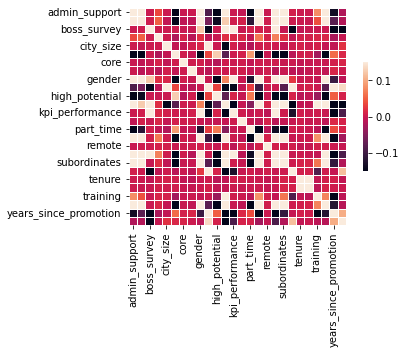

In [10]:
correlation_matrix = df.corr(method='pearson', min_periods=1)
sns.heatmap(correlation_matrix, vmax=0.15,vmin=-0.15,  # vmax and vmin define the upper and lower boundaries of the colormap respectively
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Of course, we can improve the display. One thing to note, in particular, is that a correlation matrix is always symmetric - we do not need to see both sides of the diagnoal, one is sufficient. The diagnoal itself also doesn't have any information (each variable is correlated perfectly with itself).

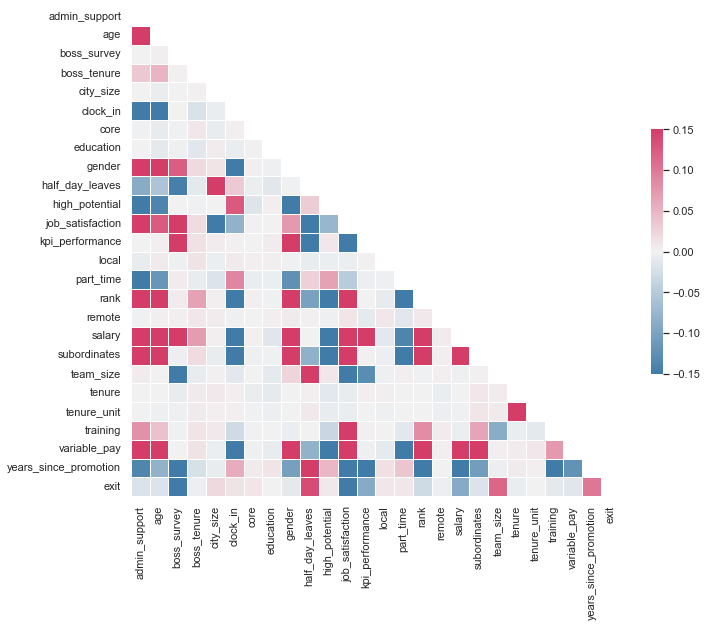

In [11]:
# Set the seaborn theme to use
sns.set(style="white")

# adapt the part of the matrix that is shown
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
# sns.palplot(sns.diverging_palette(240, 0)) Uncomment to try out different color palettes to use below
cmap = sns.diverging_palette(240, 0, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=0.15,vmin=-0.15,  # vmax and vmin define the upper and lower boundaries of the colormap respectively
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Of course, we can put the above code into a function to make use of it more flexibly

In [12]:
def plot_corr(correlation_matrix):
    # Set the seaborn theme to use
    sns.set(style="white")

    # adapt the part of the matrix that is shown
    mask = np.zeros_like(correlation_matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    # sns.palplot(sns.diverging_palette(240, 0)) Uncomment to try out different color palettes to use below
    cmap = sns.diverging_palette(240, 0, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=0.15,vmin=-0.15,  # vmax and vmin define the upper and lower boundaries of the colormap respectively
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

Let's try it out:

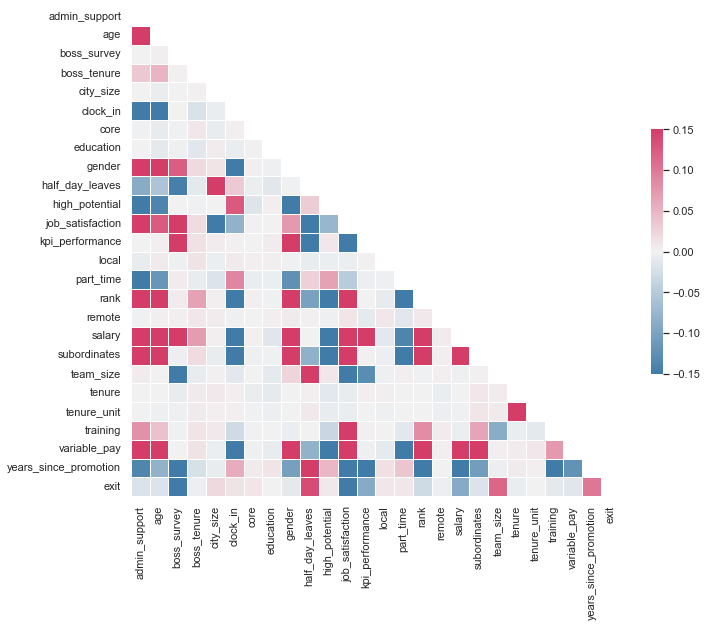

In [13]:
plot_corr(df.corr(method='pearson', min_periods=1))

# Part 3: Linear regression in Python

In an [ordinarly least squares, or OLS regression - usually simply "linear regression"](https://www.encyclopedia.com/social-sciences/applied-and-social-sciences-magazines/ordinary-least-squares-regression), we try to understand the *simultaenous* effect of multiple independent variables (X), on our dependet variable (y). As an example, we want to see how education and age, together, influence an employee's salary.

For illustrative purposes, we start with a single independent variable (age)

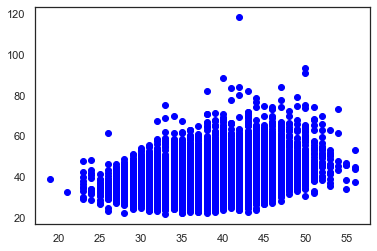

In [14]:
plt.scatter(df[['age']],df[['salary']],color="blue")
plt.show()

Note that we have used here the matplotlib function for graphing, rather than Seaborn. As for many things in Python, there are many different packages that serve the same functions with certain differences. Matplotlib is good for drawing graphs in a basic format and in interfacing with different data types. Seaborn has more of a design functionality: it can do very high-quality color schemes etc.

We now move onto the regression part. Again, there are many packages that enable us to do this. We present two here: the `statsmodels` package and the `scikit` library.
1. Pros of `statsmodels` package: great summary of the regression, easier to do polynomial regression and plotting 
2. Pros of `scikit` library: very easy to do machine learning concepts on it. 

We will see how to do linear regression in both. For this part of the class, we use `statsmodels` (note that `statsmodels` has already been imported above to run hypothesis tests). For machine learning concepts that we will see later, we will use `scikit`.

In [15]:
X = df[['age']]
Y = df[['salary']]

X = sm.add_constant(X) # In this package, by default, the regression will have no intercept, hence we need to manually add it to the X matrix, and call the result X_sm
lm = sm.OLS(Y, X).fit() # Fit an OLS with vector Y as dependent and matrix X_sm as independent
print(lm.summary()) # Display the summary of model results

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     2436.
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:48:15   Log-Likelihood:                -59815.
No. Observations:               18132   AIC:                         1.196e+05
Df Residuals:                   18130   BIC:                         1.196e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8192      0.391     50.629      0.0

Note that often, it makes sense to standardize the data first. We will look at this in class.

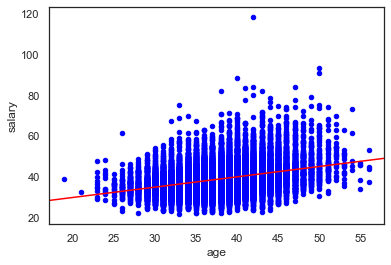

In [16]:
from statsmodels.graphics.regressionplots import abline_plot

ax = df.plot(x="age", y="salary", kind='scatter', color="blue")
abline_plot(model_results=lm, ax=ax, color="red")
plt.show()

Let's now look at multivariate associations, by adding in education as a second explanatory variable:

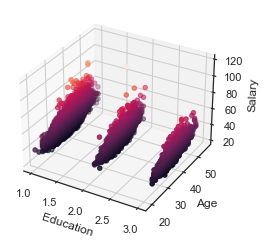

In [17]:
ax = plt.axes(projection='3d')

zdata = df[['salary']]
ydata = df[['age']]
xdata = df[['education']]
ax.scatter3D(xdata, ydata, zdata, c=zdata)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Salary')

plt.show()

We can run an OLS just like before:

In [18]:
X = df[['age','education']]
Y = df[['salary']]
X = sm.add_constant(X)
lm = sm.OLS(Y, X).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     1219.
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:48:15   Log-Likelihood:                -59814.
No. Observations:               18132   AIC:                         1.196e+05
Df Residuals:                   18129   BIC:                         1.197e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9791      0.406     49.260      0.0

Let's get a better look at the data, visualizing the coefficients. The below code displays the confidence intervals of each coefficient

<ipython-input-19-722feb7f34e1>:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


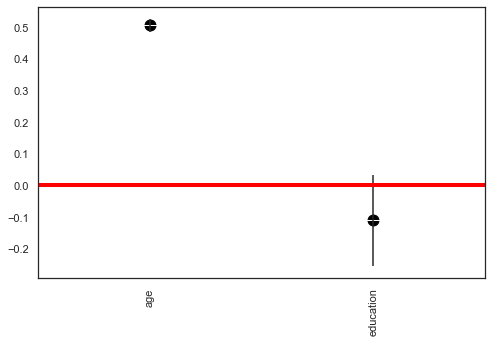

In [19]:
err_series = lm.params - lm.conf_int(alpha=0.05)[0]
coef_df = pd.DataFrame({'coef': lm.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='o', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='-', color='red', linewidth=4)
ax.xaxis.set_ticks_position('none')
plt.show()

What we actually care about is, whether employees exit the company. Hence, y should indicate whether an employee is an exiteer (not to be confused with a [Brexiteer](https://en.wikipedia.org/wiki/Glossary_of_Brexit_terms)). We combine all available information, in order to try to explain why someone left:

In [20]:
X = df.loc[:, df.columns != 'exit']
Y = df[["exit"]]
X = sm.add_constant(X)

We are now ready to fit our OLS model:

In [21]:
lm = sm.OLS(Y,X).fit()
print (lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                   exit   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     147.0
Date:                Sun, 31 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:48:15   Log-Likelihood:                -4612.2
No. Observations:               18132   AIC:                             9276.
Df Residuals:                   18106   BIC:                             9479.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.33

Let's get a better look at the coefficients. To do so, we will first create a new function based on the code we previously saw:

In [22]:
def plot_coef(model):
    err_series = model.params - model.conf_int(alpha=0.05)[0]
    coef_df = pd.DataFrame({'coef': model.params.values[1:],
                            'err': err_series.values[1:],
                            'varname': err_series.index.values[1:]
                           })
    fig, ax = plt.subplots(figsize=(8, 5))
    coef_df.plot(x='varname', y='coef', kind='bar', 
                 ax=ax, color='none', 
                 yerr='err', legend=False)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
               marker='o', s=120, 
               y=coef_df['coef'], color='black')
    ax.axhline(y=0, linestyle='-', color='red', linewidth=4)
    ax.xaxis.set_ticks_position('none')
    plt.show()

<ipython-input-22-d1cf335c7316>:13: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


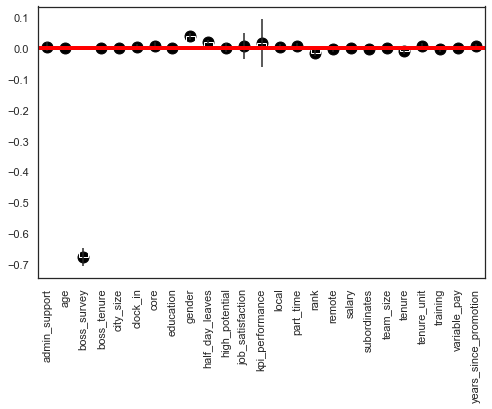

In [23]:
plot_coef(lm)

# Part 4: Logistic regression in Python

If our model were correct, how would an employee behave that has the same attributes as Employee No. 1, but a `boss_survey` value of `-1`?

In [24]:
example = X.iloc[[0]]
example.at[0, 'boss_survey'] = -1
lm.predict(example)

0    1.152897
dtype: float64

It's unclear how to interpret the result of 1.15. It's certainly not a probability! This is where Logistic regression comes in:

In a [Logistic (or Logit) regression](https://en.wikipedia.org/wiki/Logistic_regression), we try to understand the *simultaenous* effect of multiple independent variables (X), on our dependet variable (y), when y is either 0 or 1, exactly as in our problem!

In [25]:
logm = sm.Logit(endog=Y, exog=X).fit()
print (logm.summary())

Optimization terminated successfully.
         Current function value: 0.302018
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   exit   No. Observations:                18132
Model:                          Logit   Df Residuals:                    18106
Method:                           MLE   Df Model:                           25
Date:                Sun, 31 Oct 2021   Pseudo R-squ.:                  0.2387
Time:                        16:48:16   Log-Likelihood:                -5476.2
converged:                       True   LL-Null:                       -7193.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.5219      0.611     -0.854      0.393      -1.720       0.

We can, again, use our custom-made visualization function:

<ipython-input-22-d1cf335c7316>:13: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


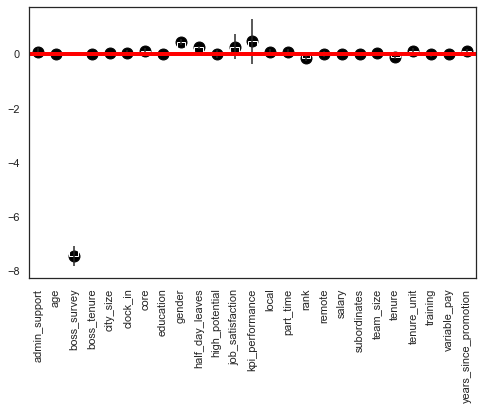

In [26]:
plot_coef(logm)

For further reading on Logit, see, for example, [here](https://statisticalhorizons.com/whats-so-special-about-logit). For more on Logit in Python, see [here](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python).